In [ ]:
# Data Preparation and Exploratory Data Analysis(EDA)

# Data quality, wrangling, feature engineering, visualization

# Cleaning

# Feature engineering

# Save processed dataset

----- DATA VALIDATION CHECKS -----
Dataset shape: (20000, 9)

Data types:
income                  float64
loan_amount             float64
loan_term_months          int64
employment_status        object
credit_history_years      int64
gender                   object
age_group                object
debt_to_income          float64
loan_default              int64
dtype: object

Missing values per column:
income                  0
loan_amount             0
loan_term_months        0
employment_status       0
credit_history_years    0
gender                  0
age_group               0
debt_to_income          0
loan_default            0
dtype: int64

Duplicate records: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_3520\319064995.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df["income"].median(), inplace=True)


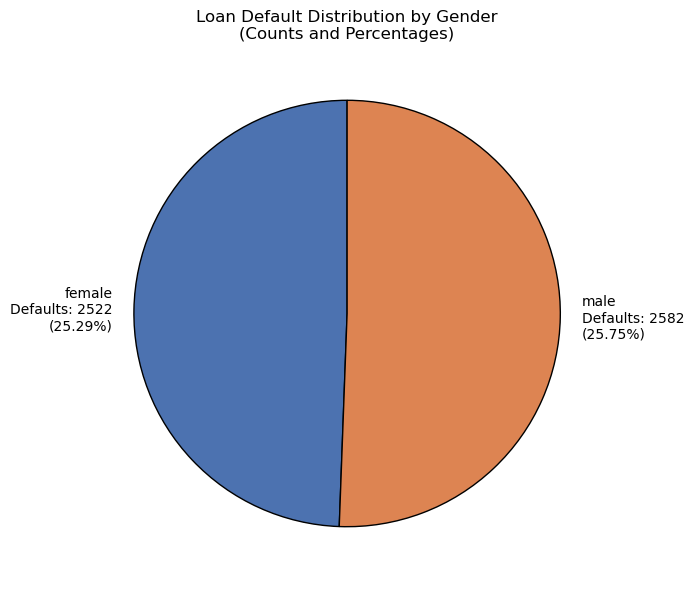

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Paths

BASE_DIR = Path("..")
RAW_PATH = BASE_DIR / "data" / "raw" / "simulated_microfinance_data.csv"
PROCESSED_DIR = BASE_DIR / "data" / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Load data

df = pd.read_csv(RAW_PATH)

# Data Validity and Integrity Checks

print("----- DATA VALIDATION CHECKS -----")

# 1. Shape and schema check
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

# 2. Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Logical validity checks
assert (df["income"] > 0).all(), "Invalid income values detected"
assert (df["loan_amount"] > 0).all(), "Invalid loan amounts detected"
assert df["loan_default"].isin([0,1]).all(), "Invalid loan_default labels detected"

# 4. Duplicate records check
print("\nDuplicate records:", df.duplicated().sum())

# Data Cleaning

# Introduce & handle missing values (simulation realism)
df.loc[df.sample(frac=0.05, random_state=42).index, "income"] = np.nan
df["income"].fillna(df["income"].median(), inplace=True)

# Outlier treatment using IQR
Q1, Q3 = df["loan_amount"].quantile([0.25, 0.75])
IQR = Q3 - Q1
df["loan_amount"] = df["loan_amount"].clip(
    lower=Q1 - 1.5 * IQR,
    upper=Q3 + 1.5 * IQR
)

# Feature engineering

df["loan_to_income"] = df["loan_amount"] / df["income"]

# Encoding and scaling

df_enc = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
num_cols = ["income", "loan_amount", "credit_history_years", "loan_to_income"]
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

# Save clean dataset
df_enc.to_csv(PROCESSED_DIR / "YourLastName.csv", index=False)

# Visualisation: Pie-chart

# Aggregate default counts by gender
gender_default_counts = df.groupby("gender")["loan_default"].sum()
gender_total_counts = df["gender"].value_counts()

# Calculate default percentages
default_percentages = (
    gender_default_counts / gender_total_counts * 100
).round(2)

# Labels with counts and percentages
labels = [
    f"{gender}\nDefaults: {gender_default_counts[gender]}\n({default_percentages[gender]}%)"
    for gender in gender_default_counts.index
]

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    gender_default_counts,
    labels=labels,
    colors=["#4C72B0", "#DD8452"],
    autopct=None,
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Loan Default Distribution by Gender\n(Counts and Percentages)")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3520\1870766423.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df["income"].median(), inplace=True)


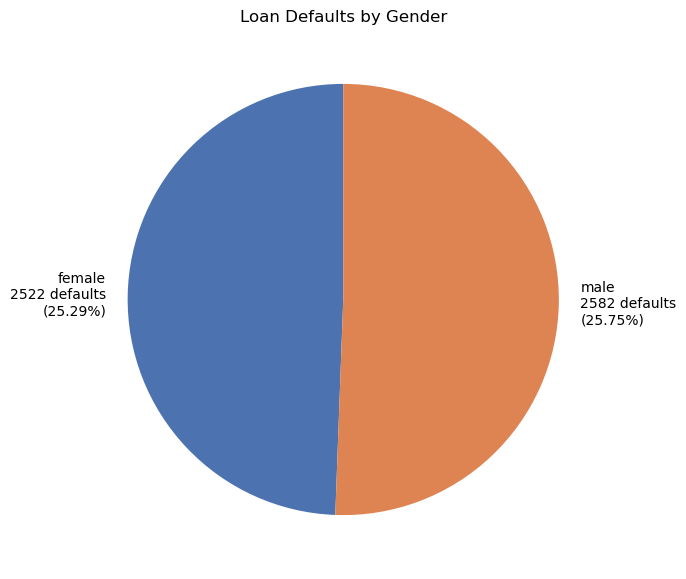

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

BASE_DIR = Path("..")
RAW_PATH = BASE_DIR / "data" / "raw" / "simulated_microfinance_data.csv"
PROC_DIR = BASE_DIR / "data" / "processed"
PROC_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(RAW_PATH)

# Validity
assert df.isnull().sum().sum() == 0
assert (df["income"] > 0).all()
assert df["loan_default"].isin([0,1]).all()

# Cleaning
df.loc[df.sample(frac=0.05, random_state=42).index, "income"] = np.nan
df["income"].fillna(df["income"].median(), inplace=True)

Q1, Q3 = df["loan_amount"].quantile([0.25,0.75])
IQR = Q3 - Q1
df["loan_amount"] = df["loan_amount"].clip(
    Q1 - 1.5*IQR, Q3 + 1.5*IQR
)

# Feature Engineering
df["loan_to_income"] = df["loan_amount"] / df["income"]

# -------- ENCODING --------
df_enc = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
num_cols = ["income","loan_amount","credit_history_years","loan_to_income"]
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

df_enc.to_csv(PROC_DIR / "YourLastName.csv", index=False)

# Visualisation
counts = df.groupby("gender")["loan_default"].sum()
totals = df["gender"].value_counts()
percentages = (counts / totals * 100).round(2)

labels = [
    f"{g}\n{counts[g]} defaults\n({percentages[g]}%)"
    for g in counts.index
]

plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=labels,
    colors=["#4C72B0", "#DD8452"],
    startangle=90
)
plt.title("Loan Defaults by Gender")
plt.show()